### • Introduction
The objective of this project is to build a Machine Learning model for the prediction of housing prices based on pattern extracted from analysing descriptive features like their Area, Street, Alley YearBuilt etc.
This project consists of two phases:

- Focuses on data cleaning, exploration and preprocessing
- Model building, validation and finding top 10 features affecting Sales Price.

#### • Discriptive features:
- SalePrice : The property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [243]:
# main libraries
import pandas as pd
import numpy as np 

#visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt

#Stats Libraries
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm

#machine learning libraries:
import xgboost as xgb
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Getting the Data

In [162]:
df_train=pd.read_csv("train.csv")

In [163]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [269]:
print("shape of data :", df_train.shape)

shape of data : (1460, 75)


### Data Pre-processing

In [165]:
#Finding Null Values
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

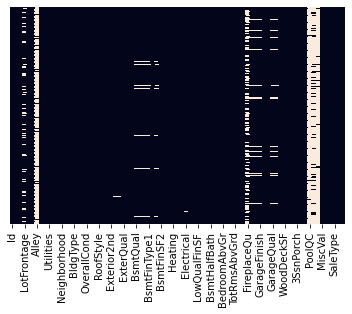

In [166]:
#Plotting Null Values for proper Visualization of null values
sns.heatmap(df_train.isnull(),yticklabels=False , cbar=False )

In [167]:
#see information about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:
#Finding null value percentage

x = pd.Series((df_train.isna().sum()/df_train.shape[0])*100)
x[x!=0.0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [169]:
#Fill missing Value
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [170]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

In [171]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])

df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [172]:
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)

In [173]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

In [174]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)


In [175]:
df_train.drop(['Id'],axis=1,inplace=True)

In [176]:
df_train.drop(['Alley'],axis=1,inplace=True)

In [177]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])

In [178]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['Electrical']=df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [179]:
df_train.shape

(1460, 75)

In [180]:
x = pd.Series((df_train.isna().sum()/df_train.shape[0])*100)
x[x!=0.0]

Series([], dtype: float64)

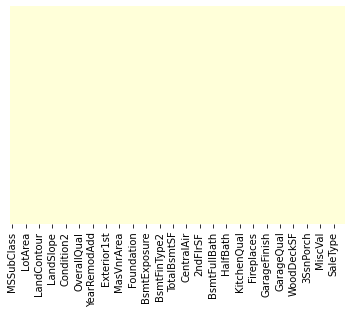

In [181]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')


- Now we dont have any null values, data is ready for building Machine Learning models

In [229]:
#After Data Pre-processing shape of Data is
df_train.shape

(1460, 75)

In [183]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [184]:
colms=df_train.columns

In [185]:
len(colms)

75

In [231]:
#Numerical Feature 
int_column = df_train.dtypes[df_train.dtypes =='int64'].index |  df_train.dtypes[df_train.dtypes =='float64'].index
len(int_column)

36

In [232]:
#Categorical Feature
obj_col=df_train.dtypes[df_train.dtypes=='object'].index
len(obj_col)

39

In [235]:
#Data copy 
main_df=df_train.copy()

## Exploratory Data Analysis 

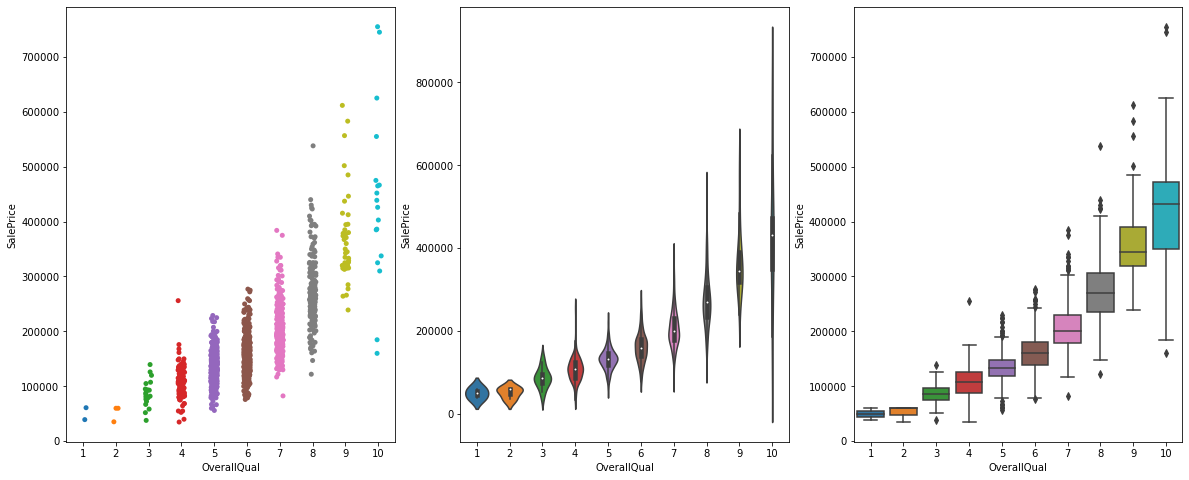

In [192]:
figure, ax = plt.subplots(1,3, figsize = (20,8))
sns.stripplot(data = df_train,x = 'OverallQual',y='SalePrice',ax = ax[0])
sns.violinplot(data = df_train,x = 'OverallQual',y='SalePrice',ax = ax[1])
sns.boxplot(data = df_train,x = 'OverallQual',y='SalePrice',ax = ax[2]);

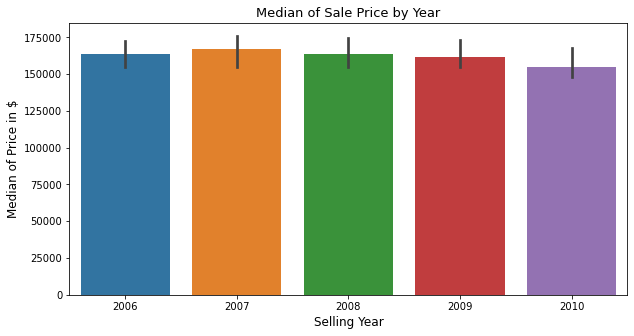

In [193]:
plt.figure(figsize = (10,5))
sns.barplot(x='YrSold', y="SalePrice", data = df_train, estimator = np.median)
plt.title('Median of Sale Price by Year', fontsize = 13)
plt.xlabel('Selling Year', fontsize = 12)
plt.ylabel('Median of Price in $', fontsize = 12)
plt.show()

In [195]:
df_train.select_dtypes('object').shape

(1460, 39)

In [197]:
test_df.select_dtypes('object').shape

(1459, 39)

In [247]:
##Applying OneHot Encoding for categorical data
onehot = OneHotEncoder()

encoderesults = onehot.fit_transform(df_train.select_dtypes('object'))
trnewdf = pd.DataFrame(encoderesults.toarray(),columns = onehot.get_feature_names())
traindf = df_train.join(trnewdf)


In [248]:
removecols = traindf.select_dtypes('object').columns.tolist()
traindf.drop(removecols,axis = 1,inplace = True)

In [249]:
traindf.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,x37_ConLw,x37_New,x37_Oth,x37_WD,x38_Abnorml,x38_AdjLand,x38_Alloca,x38_Family,x38_Normal,x38_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [250]:
#Data Shape after OHE
print(traindf.shape)

(1460, 275)


In [251]:
def normalize(df):
    
    if('SalePrice' in df.columns):
        print('True')
        numcol = list(df.select_dtypes(['int64','float64']).drop('SalePrice',axis = 1).columns)
    else:
        print('False')
        numcol = list(df.select_dtypes(['int64','float64']).columns)
    
    scaler = StandardScaler()
    
    for i in numcol:
        df[i] = scaler.fit_transform(df[[i]])
        
    return df

In [252]:
traindf = normalize(traindf)

True


In [253]:
#Data is now scaled by StandardScalar Librabry
traindf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,x37_ConLw,x37_New,x37_Oth,x37_WD,x38_Abnorml,x38_AdjLand,x38_Alloca,x38_Family,x38_Normal,x38_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


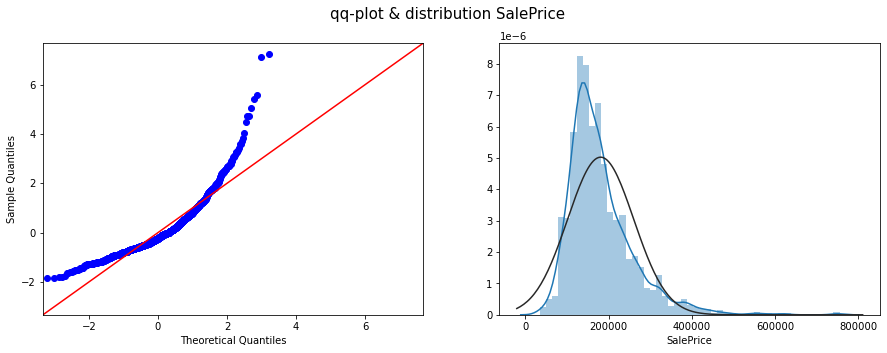

In [209]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

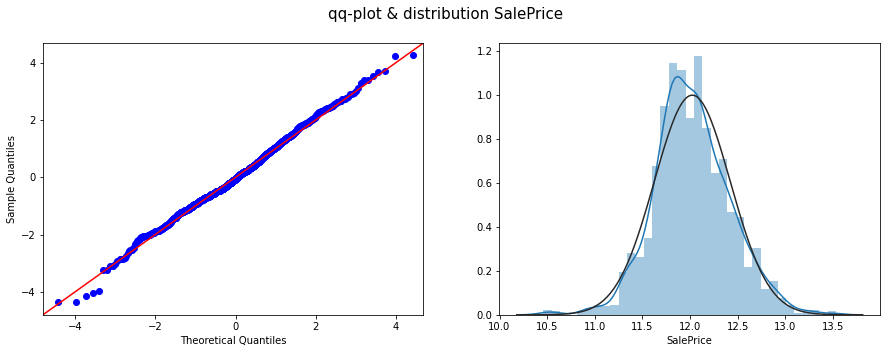

In [210]:
#SalePrice after transformation
target_log = np.log1p(target)

fig,ax = plt.subplots(1,2,figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log,stats.t,distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log,kde = True,hist=True,fit = norm, ax= ax[1])
plt.show()

In [254]:
#Storing Target in a Variable
trainX = traindf.drop('SalePrice',axis = 1)
trainY = target_log

In [255]:
trainX.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'x37_ConLw', 'x37_New', 'x37_Oth', 'x37_WD', 'x38_Abnorml',
       'x38_AdjLand', 'x38_Alloca', 'x38_Family', 'x38_Normal', 'x38_Partial'],
      dtype='object', length=274)

In [257]:
#Spliting Data into train and test where train size is 80% and test size is 20%
X_train,X_val,y_train,y_val =train_test_split(trainX,trainY,test_size=0.2)

In [259]:
#Shape of Data after spliting
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1168, 274)
(292, 274)
(1168,)
(292,)


In [218]:
#Storing Various models in a list
baseline_models = ['LinearRegression','BayesianRidge','LGBMRegressor','SVR',
                   'DecisionTreeRegressor','RandomForestRegressor', 'GradientBoostingRegressor',
                   'CatBoostRegressor']

In [260]:
#Function to find RMSE score
rmsevalues = []
def fit_and_predict(model,X_train,X_val,y_train,y_val):
    modelfit = model.fit(X_train,y_train)
    y_predict = modelfit.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_predict))
    print(rmse)
    rmsevalues.append(rmse)

In [262]:
lr = LinearRegression()
brr = BayesianRidge(compute_score=True)
lgbm = LGBMRegressor(objective='regression')
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
catb = CatBoostRegressor()

modellist = [lr,brr,lgbm,svr,dtr,rfr,gbr,catb]

for model in modellist:
    fit_and_predict(model,X_train,X_val,y_train,y_val)

440099138019.6513
0.12417843576989815
0.14009113972754594
0.18120808167734762
0.2080100782424635
0.15062485575165385
0.13762993102184642
Learning rate set to 0.040124
0:	learn: 0.3880357	total: 25.1ms	remaining: 25.1s
1:	learn: 0.3792767	total: 34.6ms	remaining: 17.3s
2:	learn: 0.3703020	total: 44.9ms	remaining: 14.9s
3:	learn: 0.3611941	total: 55.2ms	remaining: 13.7s
4:	learn: 0.3522907	total: 65.1ms	remaining: 13s
5:	learn: 0.3435615	total: 77.6ms	remaining: 12.9s
6:	learn: 0.3349906	total: 89.5ms	remaining: 12.7s
7:	learn: 0.3279721	total: 104ms	remaining: 12.9s
8:	learn: 0.3201222	total: 115ms	remaining: 12.6s
9:	learn: 0.3125981	total: 124ms	remaining: 12.3s
10:	learn: 0.3054095	total: 134ms	remaining: 12s
11:	learn: 0.2983847	total: 144ms	remaining: 11.8s
12:	learn: 0.2923451	total: 153ms	remaining: 11.6s
13:	learn: 0.2867604	total: 164ms	remaining: 11.6s
14:	learn: 0.2805750	total: 175ms	remaining: 11.5s
15:	learn: 0.2745609	total: 185ms	remaining: 11.4s
16:	learn: 0.2689929	tot

159:	learn: 0.0995072	total: 1.88s	remaining: 9.85s
160:	learn: 0.0993595	total: 1.89s	remaining: 9.86s
161:	learn: 0.0991659	total: 1.9s	remaining: 9.84s
162:	learn: 0.0989135	total: 1.91s	remaining: 9.83s
163:	learn: 0.0987520	total: 1.93s	remaining: 9.82s
164:	learn: 0.0985572	total: 1.94s	remaining: 9.82s
165:	learn: 0.0983730	total: 1.96s	remaining: 9.84s
166:	learn: 0.0980909	total: 1.97s	remaining: 9.84s
167:	learn: 0.0977669	total: 1.99s	remaining: 9.86s
168:	learn: 0.0975838	total: 2.01s	remaining: 9.87s
169:	learn: 0.0973624	total: 2.02s	remaining: 9.87s
170:	learn: 0.0971158	total: 2.04s	remaining: 9.87s
171:	learn: 0.0969229	total: 2.05s	remaining: 9.88s
172:	learn: 0.0966743	total: 2.07s	remaining: 9.88s
173:	learn: 0.0964326	total: 2.08s	remaining: 9.87s
174:	learn: 0.0962095	total: 2.09s	remaining: 9.87s
175:	learn: 0.0960129	total: 2.11s	remaining: 9.88s
176:	learn: 0.0957640	total: 2.13s	remaining: 9.88s
177:	learn: 0.0954396	total: 2.14s	remaining: 9.88s
178:	learn: 0

329:	learn: 0.0731247	total: 4.23s	remaining: 8.58s
330:	learn: 0.0730080	total: 4.24s	remaining: 8.57s
331:	learn: 0.0729324	total: 4.25s	remaining: 8.55s
332:	learn: 0.0728948	total: 4.26s	remaining: 8.53s
333:	learn: 0.0726999	total: 4.27s	remaining: 8.51s
334:	learn: 0.0725902	total: 4.28s	remaining: 8.5s
335:	learn: 0.0725361	total: 4.29s	remaining: 8.48s
336:	learn: 0.0724156	total: 4.3s	remaining: 8.46s
337:	learn: 0.0722807	total: 4.31s	remaining: 8.44s
338:	learn: 0.0721851	total: 4.32s	remaining: 8.42s
339:	learn: 0.0721061	total: 4.33s	remaining: 8.4s
340:	learn: 0.0720045	total: 4.34s	remaining: 8.38s
341:	learn: 0.0719001	total: 4.35s	remaining: 8.37s
342:	learn: 0.0718547	total: 4.36s	remaining: 8.35s
343:	learn: 0.0717666	total: 4.37s	remaining: 8.32s
344:	learn: 0.0716802	total: 4.37s	remaining: 8.3s
345:	learn: 0.0715795	total: 4.38s	remaining: 8.29s
346:	learn: 0.0714747	total: 4.39s	remaining: 8.27s
347:	learn: 0.0714326	total: 4.41s	remaining: 8.26s
348:	learn: 0.07

499:	learn: 0.0591691	total: 5.99s	remaining: 5.99s
500:	learn: 0.0590945	total: 6s	remaining: 5.98s
501:	learn: 0.0590184	total: 6.02s	remaining: 5.97s
502:	learn: 0.0589549	total: 6.03s	remaining: 5.95s
503:	learn: 0.0589219	total: 6.04s	remaining: 5.94s
504:	learn: 0.0588845	total: 6.04s	remaining: 5.92s
505:	learn: 0.0588674	total: 6.05s	remaining: 5.91s
506:	learn: 0.0588027	total: 6.06s	remaining: 5.9s
507:	learn: 0.0586920	total: 6.07s	remaining: 5.88s
508:	learn: 0.0586655	total: 6.08s	remaining: 5.87s
509:	learn: 0.0585852	total: 6.1s	remaining: 5.86s
510:	learn: 0.0584682	total: 6.11s	remaining: 5.85s
511:	learn: 0.0583818	total: 6.13s	remaining: 5.84s
512:	learn: 0.0583636	total: 6.14s	remaining: 5.83s
513:	learn: 0.0583092	total: 6.16s	remaining: 5.82s
514:	learn: 0.0582257	total: 6.17s	remaining: 5.81s
515:	learn: 0.0581468	total: 6.18s	remaining: 5.8s
516:	learn: 0.0580959	total: 6.19s	remaining: 5.79s
517:	learn: 0.0580367	total: 6.21s	remaining: 5.77s
518:	learn: 0.0579

668:	learn: 0.0493912	total: 7.76s	remaining: 3.84s
669:	learn: 0.0493127	total: 7.77s	remaining: 3.83s
670:	learn: 0.0492276	total: 7.78s	remaining: 3.81s
671:	learn: 0.0491727	total: 7.79s	remaining: 3.8s
672:	learn: 0.0491018	total: 7.8s	remaining: 3.79s
673:	learn: 0.0490980	total: 7.81s	remaining: 3.78s
674:	learn: 0.0490680	total: 7.82s	remaining: 3.76s
675:	learn: 0.0490148	total: 7.83s	remaining: 3.75s
676:	learn: 0.0489652	total: 7.83s	remaining: 3.74s
677:	learn: 0.0489225	total: 7.84s	remaining: 3.72s
678:	learn: 0.0488551	total: 7.85s	remaining: 3.71s
679:	learn: 0.0488116	total: 7.87s	remaining: 3.7s
680:	learn: 0.0487739	total: 7.88s	remaining: 3.69s
681:	learn: 0.0487047	total: 7.89s	remaining: 3.68s
682:	learn: 0.0486065	total: 7.9s	remaining: 3.67s
683:	learn: 0.0485463	total: 7.91s	remaining: 3.65s
684:	learn: 0.0485409	total: 7.92s	remaining: 3.64s
685:	learn: 0.0484862	total: 7.94s	remaining: 3.63s
686:	learn: 0.0484238	total: 7.95s	remaining: 3.62s
687:	learn: 0.04

828:	learn: 0.0418563	total: 9.36s	remaining: 1.93s
829:	learn: 0.0418481	total: 9.37s	remaining: 1.92s
830:	learn: 0.0418225	total: 9.38s	remaining: 1.91s
831:	learn: 0.0417391	total: 9.4s	remaining: 1.9s
832:	learn: 0.0416953	total: 9.41s	remaining: 1.89s
833:	learn: 0.0416517	total: 9.42s	remaining: 1.88s
834:	learn: 0.0416355	total: 9.43s	remaining: 1.86s
835:	learn: 0.0415780	total: 9.44s	remaining: 1.85s
836:	learn: 0.0415363	total: 9.45s	remaining: 1.84s
837:	learn: 0.0415130	total: 9.46s	remaining: 1.83s
838:	learn: 0.0414714	total: 9.47s	remaining: 1.82s
839:	learn: 0.0414393	total: 9.48s	remaining: 1.8s
840:	learn: 0.0414027	total: 9.49s	remaining: 1.79s
841:	learn: 0.0413431	total: 9.49s	remaining: 1.78s
842:	learn: 0.0412553	total: 9.5s	remaining: 1.77s
843:	learn: 0.0412018	total: 9.51s	remaining: 1.76s
844:	learn: 0.0411375	total: 9.52s	remaining: 1.75s
845:	learn: 0.0410878	total: 9.53s	remaining: 1.74s
846:	learn: 0.0410042	total: 9.54s	remaining: 1.72s
847:	learn: 0.04

987:	learn: 0.0357827	total: 11s	remaining: 133ms
988:	learn: 0.0357530	total: 11s	remaining: 122ms
989:	learn: 0.0357094	total: 11s	remaining: 111ms
990:	learn: 0.0356884	total: 11s	remaining: 99.9ms
991:	learn: 0.0356495	total: 11s	remaining: 88.8ms
992:	learn: 0.0356144	total: 11s	remaining: 77.7ms
993:	learn: 0.0355547	total: 11s	remaining: 66.6ms
994:	learn: 0.0354958	total: 11s	remaining: 55.5ms
995:	learn: 0.0354524	total: 11s	remaining: 44.4ms
996:	learn: 0.0354242	total: 11.1s	remaining: 33.3ms
997:	learn: 0.0354132	total: 11.1s	remaining: 22.2ms
998:	learn: 0.0353773	total: 11.1s	remaining: 11.1ms
999:	learn: 0.0353532	total: 11.1s	remaining: 0us
0.12654638257386575


In [264]:
#Storing RMSE values in data frame
finalscore = pd.DataFrame(baseline_models,columns = ['Regressors'])
finalscore['RMSE'] = rmsevalues
finalscore

,Regressors,RMSE
0,LinearRegression,4.400991e+11
1,BayesianRidge,1.241784e-01
2,LGBMRegressor,1.400911e-01
3,SVR,1.812081e-01
4,DecisionTreeRegressor,2.080101e-01
5,RandomForestRegressor,1.506249e-01
6,GradientBoostingRegressor,1.376299e-01
7,CatBoostRegressor,1.265464e-01


In [265]:
#Building CatBoost regressor of feature selection 
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,y_train,eval_set = (X_val,y_val),plot=True,verbose = 0)
cat_pred = cat_model.predict(X_val)
cat_score = np.sqrt(mean_squared_error(y_val, cat_pred))
cat_score

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.12435713378652472

In [266]:
#Storing Feature Importance in a DataFrame
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,21.284236
1,GrLivArea,16.114135
2,TotalBsmtSF,6.620323
3,GarageCars,4.337146
4,LotArea,3.454481
...,...,...
269,x34_Gd,0.000000
270,x34_TA,0.000000
271,x35_Gd,0.000000
272,x37_ConLw,0.000000


In [267]:
#Sum of Feature Importance
sum(feat_imp['Importances'])

99.99999999999983

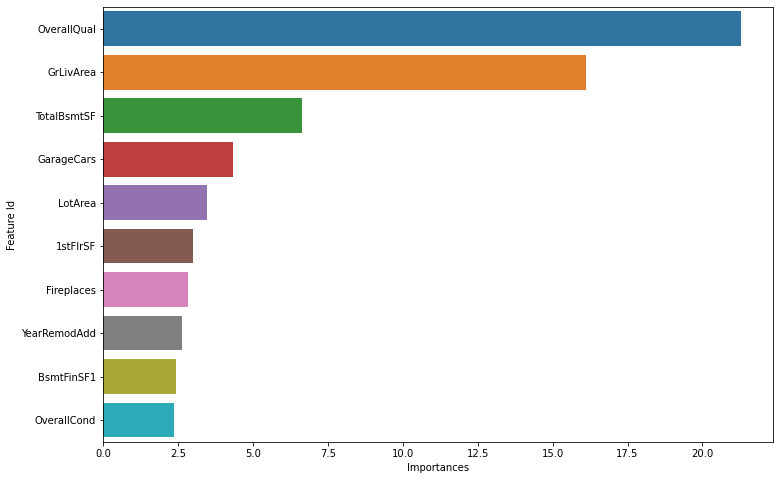

In [268]:
# Plotting top 10 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:20],feat_imp['Feature Id'][:10], orient = 'h')
plt.show()

### From the plot we can infer that the most affecting factor for the sales prices is  “OverallQual” feature  i.e, Overall material and finish quality.
